### Exercise 1.a

In [31]:
from collections import Counter
import itertools
def kmer_frequecies_(seqs,k):
    counter=Counter()
    for kmer in itertools.product('AGCT',repeat=k):
        counter[''.join(kmer)]=1
    for seq in seqs:
        for kmer in (seq[i:i+k]for i in range(len(seq)-k+1)):
            counter[kmer]+=1
    total=sum(counter.values())
    for k in counter:
        counter[k]/=total
    return counter

In [32]:
kmer_frequencies_(['ATCGATCG', 'ATCGGGCG', 'ATCTTTCG', 'ATCGATCG', 'ATCGATCG'] ,3)

Counter({'AAA': 0.010638297872340425,
         'AAG': 0.010638297872340425,
         'AAC': 0.010638297872340425,
         'AAT': 0.010638297872340425,
         'AGA': 0.010638297872340425,
         'AGG': 0.010638297872340425,
         'AGC': 0.010638297872340425,
         'AGT': 0.010638297872340425,
         'ACA': 0.010638297872340425,
         'ACG': 0.010638297872340425,
         'ACC': 0.010638297872340425,
         'ACT': 0.010638297872340425,
         'ATA': 0.010638297872340425,
         'ATG': 0.010638297872340425,
         'ATC': 0.09574468085106383,
         'ATT': 0.010638297872340425,
         'GAA': 0.010638297872340425,
         'GAG': 0.010638297872340425,
         'GAC': 0.010638297872340425,
         'GAT': 0.0425531914893617,
         'GGA': 0.010638297872340425,
         'GGG': 0.02127659574468085,
         'GGC': 0.02127659574468085,
         'GGT': 0.010638297872340425,
         'GCA': 0.010638297872340425,
         'GCG': 0.02127659574468085,
         'GCC': 0.

### 1.b

In [35]:
observed = kmer_frequencies_(seqs, 2)
background=kmer_frequencies_(seqs,1)
observed,background
x=sum(observed.values())
x# for checking that we have normalized all(sum must be 1.0, they add up to one)


1.0

In [36]:
for numb in observed:
    expect=1
    print(numb)
    for n in numb:
        expect*=background[n]
    print('observed:', observed[numb],'exp',expect)

AA
observed: 0.0196078431372549 exp 0.04183884297520662
AG
observed: 0.0196078431372549 exp 0.05578512396694215
AC
observed: 0.0196078431372549 exp 0.05113636363636364
AT
observed: 0.17647058823529413 exp 0.05578512396694215
GA
observed: 0.0784313725490196 exp 0.05578512396694215
GG
observed: 0.058823529411764705 exp 0.07438016528925619
GC
observed: 0.0392156862745098 exp 0.06818181818181818
GT
observed: 0.0196078431372549 exp 0.07438016528925619
CA
observed: 0.0196078431372549 exp 0.05113636363636364
CG
observed: 0.19607843137254902 exp 0.06818181818181818
CC
observed: 0.0196078431372549 exp 0.0625
CT
observed: 0.0392156862745098 exp 0.06818181818181818
TA
observed: 0.0196078431372549 exp 0.05578512396694215
TG
observed: 0.0196078431372549 exp 0.07438016528925619
TC
observed: 0.19607843137254902 exp 0.06818181818181818
TT
observed: 0.058823529411764705 exp 0.07438016528925619


In [37]:
def log_odds_ratio(observed, background):
    from math import log2
    """
    Calculates the log-odds ratio of a k-mer.
    """
    for kmer in observed:
        expect=1
        #print(numb)
        for n in kmer:
            expect*=background[n]
    #print('observed:', observed[kmer],'exp',expect)
    odds_ratio = {}
    for kmer in observed:
        odds_ratio[kmer] = (log2(observed[kmer] / expect) )
    return odds_ratio


In [38]:
log_odds_ratio(observed, background)

{'AA': -1.9234871061392131,
 'AG': -1.9234871061392131,
 'AC': -1.9234871061392131,
 'AT': 1.2464378953030992,
 'GA': 0.0765128938607868,
 'GG': -0.3385246054180571,
 'GC': -0.9234871061392131,
 'GT': -1.9234871061392131,
 'CA': -1.9234871061392131,
 'CG': 1.3984409887481493,
 'CC': -1.9234871061392131,
 'CT': -0.9234871061392131,
 'TA': -1.9234871061392131,
 'TG': -1.9234871061392131,
 'TC': 1.3984409887481493,
 'TT': -0.3385246054180571}

### 1.c

In [39]:
def read_fa(filename):
    seqList=[]
    seqAcc=[]
    header=None
    for line in open(filename):
        line = line.strip()
        if line.startswith('>'):
            if header: # make sure header is valid
                newSeq_hd = (header,)
                newSeq=''.join(seqAcc)
                seqList.append(newSeq)
            header = line[1:]
            seqAcc=[]
        else:
            seqAcc.append(line)
    if header:
        newSeq_hd = (header,) # last sequence
        newSeq=''.join(seqAcc)
        seqList.append(newSeq)
    return seqList


In [40]:
# loading the sequence in seq_in and seq_se respectively
seq_in=read_fa('exosome-insensitive.fa')
seq_se=read_fa('exosome-sensitive.fa')
merged=seq_in+seq_se


#### ii. observed frequencies of k-mers for sensitive and insensitive, for k=2

In [56]:
observed_sensitive_2=kmer_frequencies_(seq_se,2)
observed_insensitive_2=kmer_frequencies_(seq_in,2)
#observed_sensitive,observed_insensitive


#### iii. using the common background frequency calculate the log-odds ratio for the set of sensitive and insensitive sequence, for k=2

In [70]:
log_odd_r_sensitive_2=log_odds_ratio(observed_sensitive_2,backgrund_se_in)
#log_odd_r_sensitive_2
log_odd_r_insensitive_2=log_odds_ratio(observed_insensitive_2,backgrund_se_in)
log_odd_r_sensitive_2,log_odd_r_insensitive_2

({'AA': 0.47220799356343146,
  'AG': 0.4092009726056812,
  'AC': -0.16256380554285138,
  'AT': -0.10587117580351194,
  'GA': 0.20415816763306602,
  'GG': 0.58237090353315,
  'GC': 0.3119490995827524,
  'GT': -0.04452140867752407,
  'CA': 0.2171590765438957,
  'CG': -0.4089040690665217,
  'CC': 0.4932774961401591,
  'CT': 0.38280997349596196,
  'TA': -0.2545188559507913,
  'TG': 0.3569801831872299,
  'TC': 0.11405699301568473,
  'TT': 0.530152894141335},
 {'AA': -0.27786499468879483,
  'AG': 0.4026075513451005,
  'AC': -0.4009789186327986,
  'AT': -0.715326151735505,
  'GA': 0.21004405765023876,
  'GG': 1.0505210409910293,
  'GC': 0.7313889306073389,
  'GT': -0.018070432089524146,
  'CA': -0.0018894900882693018,
  'CG': 0.22719051301813112,
  'CC': 0.8269565967198789,
  'CT': 0.42467032393170895,
  'TA': -0.9026310180063389,
  'TG': 0.3897824183100357,
  'TC': 0.12779303526605706,
  'TT': 0.08216764325445555})

#### i.calculating background frequencies, k=3

In [58]:
backgrund_se_in=kmer_frequencies_(merged,1)
backgrund_se_in

Counter({'A': 0.2156571373714505,
         'G': 0.28748385006459976,
         'C': 0.26542893828424685,
         'T': 0.23143007427970289})

#### ii. observed frequencies of k-mers for sensitive and insensitive, for k=3

In [59]:
observed_sensitive_3=kmer_frequencies_(seq_se,3)
observed_insensitive_3=kmer_frequencies_(seq_in,3)




#### iii. using the common background frequency calculate the log-odds ratio for the set of sensitive and insensitive sequence, for k=3


In [60]:
log_odd_r_sensitive_3=log_odds_ratio(observed_sensitive_3,backgrund_se_in)
log_odd_r_sensitive_3

{'AAA': 1.1888020732964146,
 'AAG': 0.46774204741715214,
 'AAC': 0.01989975215558462,
 'AAT': 0.3956484731140868,
 'AGA': 0.5959405577027376,
 'AGG': 0.8036664094896332,
 'AGC': 0.3926315809764964,
 'AGT': 0.2227731967179921,
 'ACA': 0.2633652186158669,
 'ACG': -0.9640879298557845,
 'ACC': 0.09453275417456654,
 'ACT': 0.10952587922269588,
 'ATA': -0.12796888363802217,
 'ATG': -0.06367235051490883,
 'ATC': -0.2557952237095431,
 'ATT': 0.3840790844019499,
 'GAA': 0.4997624865331726,
 'GAG': 0.8019284640881926,
 'GAC': -0.12364295823523212,
 'GAT': -0.14462984479487043,
 'GGA': 0.7159446802556896,
 'GGG': 0.9689820151645582,
 'GGC': 0.8007240435026796,
 'GGT': 0.17420122913739097,
 'GCA': 0.22177361582794683,
 'GCG': 0.14475958206636552,
 'GCC': 0.7526728686800804,
 'GCT': 0.4956331831219824,
 'GTA': -0.4046767700948241,
 'GTG': 0.4895000416381313,
 'GTC': -0.1004544884267788,
 'GTT': 0.13714528181231056,
 'CAA': 0.2099259596544063,
 'CAG': 0.7925341376042863,
 'CAC': 0.28419872203303254,

In [62]:
log_odd_r_insensitive_3=log_odds_ratio(observed_insensitive_3,backgrund_se_in)
#log_odd_r_insensitive_3


{'AAA': 0.07916142872317189,
 'AAG': 0.18900666736055804,
 'AAC': -0.5476861798455981,
 'AAT': -0.5524667121659323,
 'AGA': 0.3088834984046071,
 'AGG': 0.9682669837402624,
 'AGC': 0.5905299618693765,
 'AGT': 0.014599532802179325,
 'ACA': -0.3635889112484382,
 'ACG': -0.7726376304834461,
 'ACC': 0.1004181995361266,
 'ACT': -0.25496008907499884,
 'ATA': -1.1523848986280163,
 'ATG': -0.3540187597976668,
 'ATC': -0.6555982092932267,
 'ATT': -0.38840617798577676,
 'GAA': 0.19186794193102877,
 'GAG': 1.0705258252255527,
 'GAC': 0.042720459565686195,
 'GAT': -0.46198908518005083,
 'GGA': 0.9449545626213386,
 'GGG': 1.6160134268212225,
 'GGC': 1.3623826594672521,
 'GGT': 0.47631703298868605,
 'GCA': 0.2956442008722169,
 'GCG': 0.9247033103669833,
 'GCC': 1.2603503841055697,
 'GCT': 0.7257084326730674,
 'GTA': -0.7926976733735579,
 'GTG': 0.6716836643525602,
 'GTC': 0.14497051781363643,
 'GTT': -0.012668110300846094,
 'CAA': -0.43967563710186897,
 'CAG': 0.8628272890321382,
 'CAC': 0.0515236014

#### ii. observed frequencies of k-mers for sensitive and insensitive, for k=4

In [63]:
observed_sensitive_4=kmer_frequencies_(seq_se,4)
observed_insensitive_4=kmer_frequencies_(seq_in,4)


#### iii. using the common background frequency calculate the log-odds ratio for the set of sensitive and insensitive sequence, for k=4

In [69]:
log_odd_r_sensitive_4=log_odds_ratio(observed_sensitive_4,backgrund_se_in)
#log_odd_r_sensitive_4
log_odd_r_insensitive_4=log_odds_ratio(observed_insensitive_4,backgrund_se_in)
log_odd_r_insensitive_4,log_odd_r_sensitive_4

({'AAAA': 0.5398001032446638,
  'AAAG': 0.33041176146769147,
  'AAAC': -0.21227238331175102,
  'AAAT': -0.014962159700793504,
  'AAGA': 0.28478914434189395,
  'AAGG': 0.6640009659569952,
  'AAGC': 0.1540569107598578,
  'AAGT': 0.01827416977313847,
  'AACA': -0.3558632369406008,
  'AACG': -1.056302955081693,
  'AACC': -0.20528030965343422,
  'AACT': -0.2718963659981695,
  'AATA': -0.6576089692552686,
  'AATG': -0.23701500352810886,
  'AATC': -0.6576089692552686,
  'AATT': -0.2706794152377873,
  'AGAA': 0.505406814512362,
  'AGAG': 0.9484074628042785,
  'AGAC': 0.11455371900577745,
  'AGAT': -0.11952807952727645,
  'AGGA': 1.0853883656316754,
  'AGGG': 1.350322304380951,
  'AGGC': 1.1472442345984426,
  'AGGT': 0.6473592237266023,
  'AGCA': 0.32317616236782787,
  'AGCG': 0.5862105682016219,
  'AGCC': 1.1210586352024012,
  'AGCT': 0.6537826316703649,
  'AGTA': -0.5681825776283481,
  'AGTG': 0.5652378442237984,
  'AGTC': 0.07393834488813751,
  'AGTT': 0.21091924771553436,
  'ACAA': -0.55924

In [92]:
observed_sensitive_6=kmer_frequencies_(seq_se,6)
observed_insensitive_6=kmer_frequencies_(seq_in,6)
log_odd_r_sensitive_6=log_odds_ratio(observed_sensitive_6,backgrund_se_in)
#log_odd_r_sensitive_6
log_odd_r_insensitive_6=log_odds_ratio(observed_insensitive_6,backgrund_se_in)
#log_odd_r_insensitive_6,log_odd_r_sensitive_6

### 1.d To discriminate k-mer composition of sensitive and insensitive RNA sequences you could take either difference/ratio of the log_odd

In [ ]:
# write a function that determines the correct discriminatory values for each k-mer.
# we could go with the ratio, but the values(-ve and +ve) will not help us discriminate among the sensitive and insensitive
"""function that takes a difference(sensitive-insensitive)
the higher the +ve the more its sensitive
and the lower the value the more its insensitive"""


In [67]:
def discriminate_kmer_log_odd(a, b):
    """
    returns a dictionary with the subtraction of a and b
    """
    return {key: a[key] - b[key] for key in a.keys()}

In [80]:
# for k=2
dicriminator_2=discriminate_kmer_log_odd(log_odd_r_sensitive_2,log_odd_r_insensitive_2)
dicriminator_2

{'AA': 0.7500729882522263,
 'AG': 0.006593421260580712,
 'AC': 0.23841511308994723,
 'AT': 0.609454975931993,
 'GA': -0.00588589001717274,
 'GG': -0.46815013745787926,
 'GC': -0.4194398310245865,
 'GT': -0.026450976587999924,
 'CA': 0.21904856663216501,
 'CG': -0.6360945820846529,
 'CC': -0.3336791005797198,
 'CT': -0.041860350435746985,
 'TA': 0.6481121620555477,
 'TG': -0.03280223512280578,
 'TC': -0.013736042250372338,
 'TT': 0.44798525088687946}

In [75]:
# for k=3
dicriminator_3=discriminate_kmer_log_odd(log_odd_r_sensitive_3,log_odd_r_insensitive_3)
#dicriminator_3

In [76]:
# for k=4
dicriminator_4=discriminate_kmer_log_odd(log_odd_r_sensitive_4,log_odd_r_insensitive_4)
#dicriminator_4

In [94]:
# for k=6
dicriminator_6=discriminate_kmer_log_odd(log_odd_r_sensitive_6,log_odd_r_insensitive_6)
#dicriminator_6

### 1.(e). Sort the k_mers from the lowest to the highest dicriminatory values.
#### what are the 16 kmers with highest/lowest scores
#### plot the dicriminatory values from lowest to highest for all k-mers using matplotlib or python plotting library
- the x- axis contains the k-mers in increasing order of their dicriminatory value and
- the y- axis is the value, perform these calculations for k=2,3 and 6

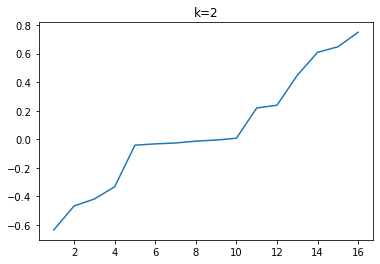

In [88]:

import matplotlib.pyplot as plt

sorted_discr = sorted(dicriminator_2.values())
x = list(range(1,len(sorted_discr)+1))
plt.plot(x,sorted_discr)
plt.title(f"k=2")
plt.show()

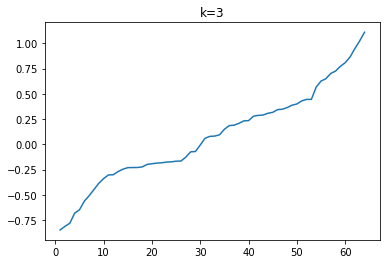

In [89]:
sorted_discr = sorted(dicriminator_3.values())
x = list(range(1,len(sorted_discr)+1))
plt.plot(x,sorted_discr)
plt.title(f"k=3")
plt.show()

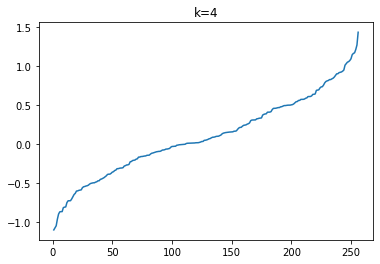

In [90]:
sorted_discr = sorted(dicriminator_4.values())
x = list(range(1,len(sorted_discr)+1))
plt.plot(x,sorted_discr)
plt.title(f"k=4")
plt.show()

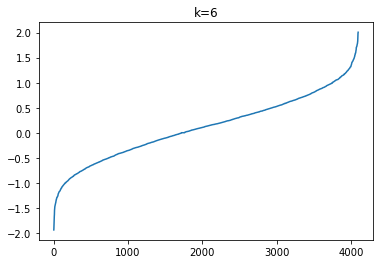

In [95]:
sorted_discr = sorted(dicriminator_6.values())
x = list(range(1,len(sorted_discr)+1))
plt.plot(x,sorted_discr)
plt.title(f"k=6")
plt.show()

### 2.a Building machine learning models

In [ ]:
# k-mer frequencies can be used as simple features for training machine learning
#models to distinguish sensitive and insensitive transcripts.
"""generate kmer frequency feature vectors for all transcripts"""

In [136]:
data_2=[]
for s in seq_se:
    features=kmer_frequencies_([s],2)
    features['outcome']=1
    data_2.append(features)
for s in seq_in:
    features=kmer_frequencies_([s],2)
    features['outcome']=0
    data_2.append(features)
data_3=[]
for s in seq_se:
    features=kmer_frequencies_([s],3)
    features['outcome']=1
    data_3.append(features)
for s in seq_in:
    features=kmer_frequencies_([s],3)
    features['outcome']=0
    data_3.append(features)
data_4=[]
for s in seq_se:
    features=kmer_frequencies_([s],4)
    features['outcome']=1
    data_4.append(features)
for s in seq_in:
    features=kmer_frequencies_([s],4)
    features['outcome']=0
    data_4.append(features)


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm

In [137]:
df_2=pd.DataFrame(data_2)
df_3=pd.DataFrame(data_3)
df_4=pd.DataFrame(data_4)

In [138]:
df_2

AA        AG        AC        AT        GA        GG        GC  \
0    0.024631  0.043350  0.035468  0.015764  0.040394  0.113300  0.133005   
1    0.061084  0.072906  0.061084  0.034483  0.070936  0.086700  0.074877   
2    0.075862  0.060099  0.039409  0.061084  0.057143  0.071921  0.053202   
3    0.037438  0.072906  0.049261  0.031527  0.058128  0.060099  0.089655   
4    0.078818  0.090640  0.039409  0.048276  0.067980  0.080788  0.074877   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.019704  0.079803  0.051232  0.020690  0.051232  0.121182  0.101478   
996  0.051232  0.097537  0.038424  0.033498  0.082759  0.129064  0.074877   
997  0.038424  0.079803  0.045320  0.036453  0.076847  0.100493  0.090640   
998  0.032512  0.071921  0.044335  0.020690  0.065025  0.184236  0.080788   
999  0.045320  0.068966  0.022660  0.028571  0.046305  0.123153  0.115271   

           GT        CA        CG        CC        CT        TA        TG  \
0    0.030542  0.050246  0.111330  0.205911  0.067980  0.003941  0.048276   
1    0.034483  0.055172  0.048276  0.110345  0.081773  0.042365  0.059113   
2    0.061084  0.052217  0.039409  0.063054  0.072906  0.051232  0.071921   
3    0.058128  0.072906  0.058128  0.103448  0.079803  0.021675  0.074877   
4    0.044335  0.053202  0.047291  0.071921  0.063054  0.057143  0.049261   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.041379  0.082759  0.050246  0.130049  0.083744  0.018719  0.064039   
996  0.054187  0.061084  0.048276  0.057143  0.052217  0.025616  0.065025   
997  0.044335  0.056158  0.063054  0.101478  0.064039  0.028571  0.068966   
998  0.045320  0.050246  0.054187  0.091626  0.078818  0.021675  0.065025   
999  0.050246  0.050246  0.083744  0.101478  0.066995  0.023645  0.059113   

           TC        TT  outcome  
0    0.061084  0.014778        1  
1    0.049261  0.057143        1  
2    0.070936  0.098522        1  
3    0.072906  0.059113        1  
4    0.049261  0.083744        1  
..        ...       ...      ...  
995  0.063054  0.020690        0  
996  0.048276  0.080788        0  
997  0.047291  0.058128        0  
998  0.058128  0.035468        0  
999  0.062069  0.052217        0  

[1000 rows x 17 columns]

In [139]:
df_2.shape, df_3.shape,df_4.shape

((1000, 17), (1000, 65), (1000, 257))

In [140]:
# k=2
features = df_2.drop(['outcome'], axis=1)
labels = df_2['outcome']
# k=3
features_3 = df_3.drop(['outcome'], axis=1)
labels_3= df_3['outcome']
# k=4
features_4 = df_4.drop(['outcome'], axis=1)
labels_4 = df_4['outcome']


In [116]:
features.shape

(1000, 16)

In [117]:
labels.shape

(1000,)

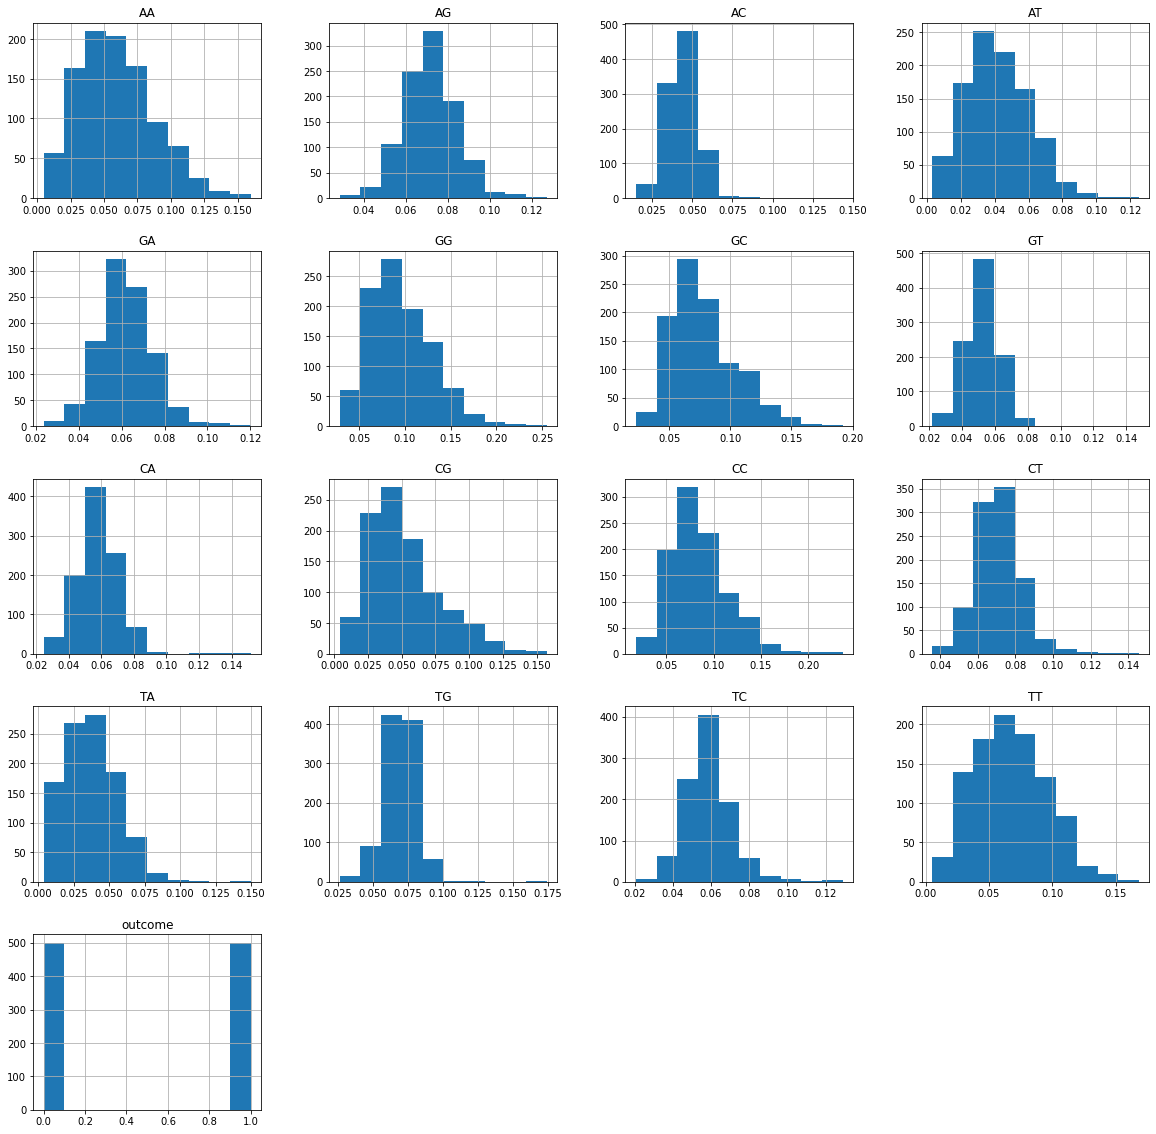

In [127]:
p =df_2.hist(figsize = (20,20))

<AxesSubplot:>

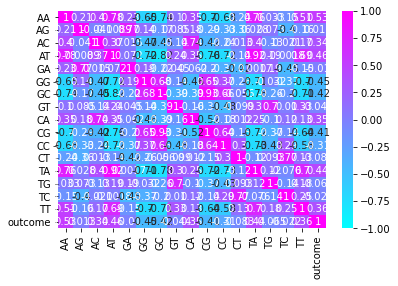

In [128]:
# Correlation data 
corr = df_2.corr()
# Correlation matrix with seaborn (correlation val are -1 to 1, thats why vmin vmax)
sns.heatmap(corr, vmin = -1, vmax = +1, annot = True, cmap = 'cool')

### 2.a 
- Divide the data set into a training set and test set for external validation 
- 80% for training and the remaining 20% for testing

In [141]:
# Create training (80%) and test (20%) sets
# k=2
features_train, features_test , labels_train , labels_test = train_test_split(features, labels, test_size =0.20)
# k=3
features_train_3, features_test_3 , labels_train_3 , labels_test_3 = train_test_split(features_3, labels_3, test_size =0.20)
# k=4
features_train_4, features_test_4 , labels_train_4 , labels_test_4 = train_test_split(features_4, labels_4, test_size =0.20)

#### 2.b 
- using the training set, train Support Vector Machines with a linear kernel using grid search for parameter
- C selecting C from [10^x for x in numpy.linespace(-2,2,9)], i.e [0.01,0.0316,0.1,0.316,1,3.16,10,31.6,100] for k=2,3 and 4
- use cross validation with an appropriate number of n folds i.e n=5
- which is the best C for the different K's

In [122]:

# Create a pipeline for the SVM
pipeline = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='linear'))])


# Create a list for the parameter C
Cs = [10**x for x in np.linspace(-2,2,9)]


# Create a list for the parameter gamma
gammas = [10**x for x in np.linspace(-2,2,9)]


# Create a dictionary for the parameter grid
param_grid = {'svc__C': Cs, 'svc__gamma': gammas}


# Create a GridSearchCV object
grid = GridSearchCV(pipeline, param_grid, cv=3)


# Fit the GridSearchCV object to the training data
grid.fit(features_train,labels_train)


# Print the best parameters
print(grid.best_params_)
# Print the best score
print(grid.best_score_)


{'svc__C': 3.1622776601683795, 'svc__gamma': 0.01}
0.7550054912562305


### 2.c
- Determine accuracy, precision and recall for the test set for the best three classifiers corresponding to k=2,3 and 4

In [149]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
clf = svm.SVC(gamma=0.01,C=3.1622776601683795,kernel='linear')
# k=2
clf.fit(features_train,labels_train)
y_pred = clf.predict(features_test)
# k=3
clf.fit(features_train_3,labels_train_3)
y_pred_3 = clf.predict(features_test_3)
# k=4
clf.fit(features_train_4,labels_train_4)
y_pred_4= clf.predict(features_test_4)



In [151]:
# Check accuracy
accuracy = accuracy_score(labels_test , y_pred)
accuracy_3 = accuracy_score(labels_test_3 , y_pred_3)
accuracy_4 = accuracy_score(labels_test_4 , y_pred_4)
# Check precision
precision = precision_score(labels_test , y_pred)
precision_3 = precision_score(labels_test_3 , y_pred_3)
precision_4 = precision_score(labels_test_4 , y_pred_4)

# Check recall
recall = recall_score(labels_test , y_pred)
recall_3 = recall_score(labels_test_3 , y_pred_3)
recall_4 = recall_score(labels_test_4 , y_pred_4)
print(f'Accuracy:{accuracy}, Precision: {precision}, and Recall: {recall} for k=2')
print(f'Accuracy:{accuracy_3}, Precision: {precision_3}, and Recall: {recall_3} for k=3')
print(f'Accuracy:{accuracy_4}, Precision: {precision_4}, and Recall: {recall_4} for k=4')

Accuracy:0.725, Precision: 0.7021276595744681, and Recall: 0.7096774193548387 for k=2
Accuracy:0.705, Precision: 0.6666666666666666, and Recall: 0.7578947368421053 for k=3
Accuracy:0.7, Precision: 0.6323529411764706, and Recall: 0.8958333333333334 for k=4


### 2.d Repeat (b) and (c) for Random Forest Classfier.
- use default parameter

In [156]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest Classifier
classifier_rf = RandomForestClassifier(criterion='entropy')
classifier_rf_3 = RandomForestClassifier(criterion='entropy')
classifier_rf_4= RandomForestClassifier(criterion='entropy')
#fitting
classifier_rf.fit(features_train,labels_train)

#Feed data into Random Forest Algorithm
# classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
# classifier_rf.fit(features_train, labels_train)

RandomForestClassifier(criterion='entropy')

In [157]:
# Determining Accuracy, precision and recall
pred_rf = classifier_rf.predict(features_test)
#k=3
classifier_rf_3.fit(features_train_3,labels_train_3)
pred_rf_3 = classifier_rf_3.predict(features_test_3)
# k=4
classifier_rf_4.fit(features_train_4,labels_train_4)
pred_rf_4 = classifier_rf_4.predict(features_test_4)


In [158]:
# Check accuracy
accuracy_rf = accuracy_score(labels_test , pred_rf)
accuracy_rf_3 = accuracy_score(labels_test_3 , pred_rf_3)
accuracy_rf_4 = accuracy_score(labels_test_4 , pred_rf_4)

# Check precision
precision_rf = precision_score(labels_test , pred_rf)
precision_rf_3 = precision_score(labels_test_3 , pred_rf_3)
precision_rf_4 = precision_score(labels_test_4 , pred_rf_4)

# Check recall
recall_rf = recall_score(labels_test , pred_rf)
recall_rf_3 = recall_score(labels_test_3 , pred_rf_3)
recall_rf_4 = recall_score(labels_test_4 , pred_rf_4)
print(f'Accuracy:{accuracy_rf}, Precision: {precision_rf}, and Recall: {recall_rf} for k=2')
print(f'Accuracy:{accuracy_rf_3}, Precision: {precision_rf_3}, and Recall: {recall_rf_3} for k=3')
print(f'Accuracy:{accuracy_rf_4}, Precision: {precision_rf_4}, and Recall: {recall_rf_4} for k=4')

Accuracy:0.73, Precision: 0.7532467532467533, and Recall: 0.6236559139784946 for k=2
Accuracy:0.775, Precision: 0.7604166666666666, and Recall: 0.7684210526315789 for k=3
Accuracy:0.8, Precision: 0.8111111111111111, and Recall: 0.7604166666666666 for k=4
